# Pymaceuticals Inc.
---

### Analysis

- there was a strong correlation between tumor size and the weight of the mouse. capomulin showed promise in reduction of tumor size when looking at a single mouse. It has also been used the most.

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_all = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_all.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [79]:
# Checking the number of mice.
number_of_mice = study_all['Mouse ID'].nunique()
print( {unique_mice_ids_before})


{249}


In [80]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_all[study_all.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
print(duplicate_mice)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female 

In [81]:
# Optional: Get all the data for the duplicate mouse ID. 


In [82]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data_df = study_all.drop_duplicates(['Mouse ID', 'Timepoint'])
cleaned_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [83]:
# Checking the number of mice in the clean DataFrame.
mice = cleaned_data_df['Mouse ID'].nunique()
print({mice})

{249}


## Summary Statistics

In [85]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = cleaned_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats.head(10)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [86]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats.head(10)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

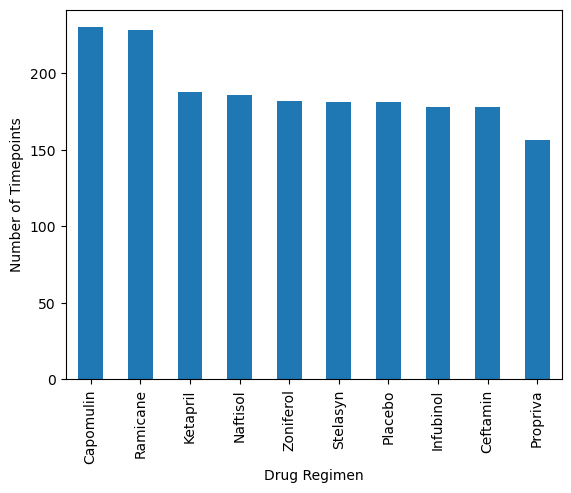

In [88]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_chart_one = cleaned_data_df['Drug Regimen'].value_counts().plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.show()

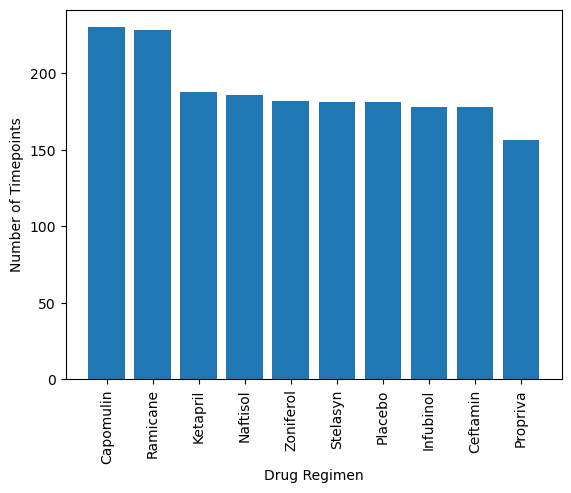

In [89]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = cleaned_data_df['Drug Regimen'].value_counts()
drug_regimen_labels = drug_regimen_counts.index

plt.bar(drug_regimen_labels, drug_regimen_counts)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')

plt.xticks(rotation=90)

plt.show()

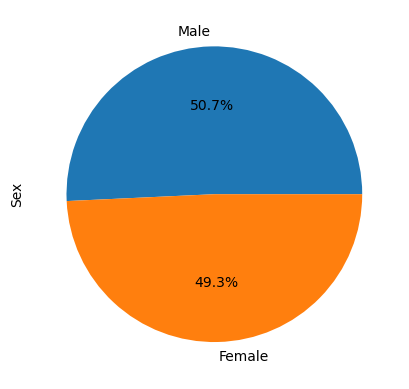

In [90]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_chart_one = cleaned_data_df['Sex'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('Sex') 
plt.show()

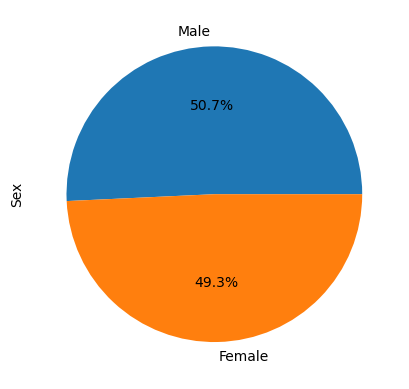

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = cleaned_data_df['Sex'].value_counts()
sex_labels = sex_counts.index
plt.ylabel('Sex')

plt.pie(sex_counts, labels=sex_labels, autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [93]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = cleaned_data_df.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_data = pd.merge(last_timepoint_df, cleaned_data_df, on=['Mouse ID', 'Timepoint'], how='left')


In [94]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = []


for drug in treatments:
    final_tumor_volume = last_timepoint_data.loc[last_timepoint_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_volume_data.append(final_tumor_volume)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i, drug in enumerate(treatments):
    quartiles = tumor_volume_data[i].quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr

    outliers = tumor_volume_data[i][(tumor_volume_data[i] < lower_bound) | (tumor_volume_data[i] > upper_bound)]
    
    print(f"{drug} Potential outliers for : {outliers}")


Capomulin Potential outliers for : Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Potential outliers for : Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol Potential outliers for : 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Potential outliers for : Series([], Name: Tumor Volume (mm3), dtype: float64)


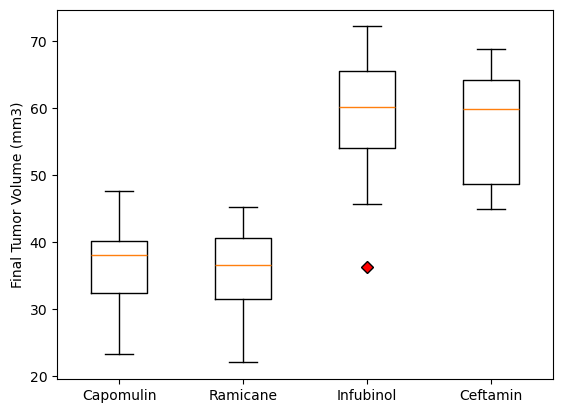

In [95]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(tumor_volume_data, labels=treatments, flierprops=dict(markerfacecolor='r', marker='D'))
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

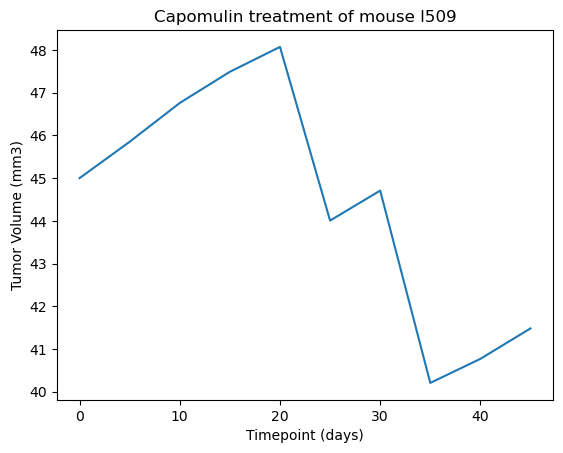

In [97]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_graph = cleaned_data_df[cleaned_data_df['Drug Regimen'] == 'Capomulin']
single_mouse_capomulin = capomulin_graph.loc[capomulin_graph['Mouse ID'] == 'l509']

# line plot
plt.plot(single_mouse_capomulin['Timepoint'], single_mouse_capomulin['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


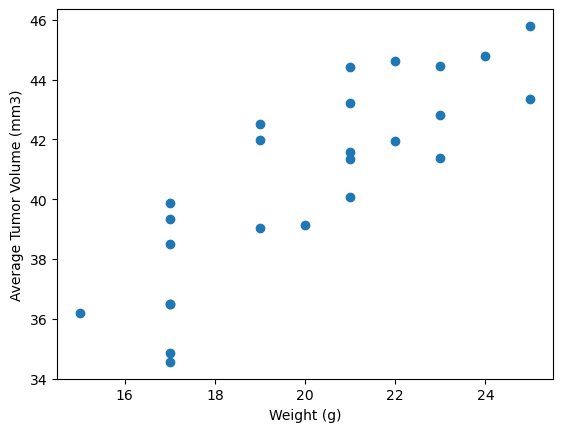

In [98]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor_volume = capomulin_graph.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_graph.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(mouse_weight, average_tumor_volume, marker='o')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [100]:
import numpy as np
from scipy.stats import linregress

The correlation between mouse weight and the average tumor volume is: 0.84


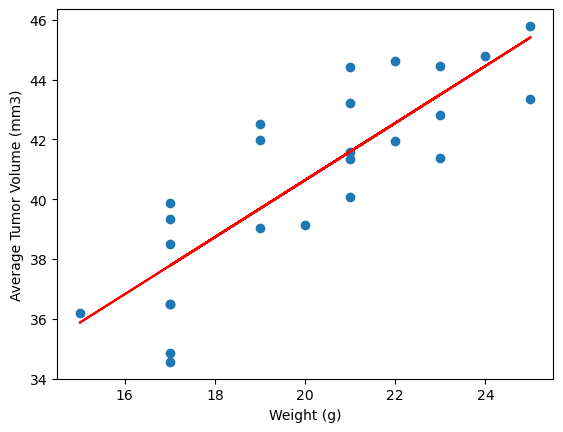

In [101]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = np.corrcoef(mouse_weight, average_tumor_volume)[0, 1]
rounded_coefficient = round(correlation_coefficient, 2)
print(f"The correlation between mouse weight and the average tumor volume is: {rounded_coefficient}")

slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, average_tumor_volume)

predicted_values = slope * mouse_weight + intercept

plt.scatter(mouse_weight, average_tumor_volume, marker='o')
plt.plot(mouse_weight, predicted_values, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()